**Описание проекта**
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Описание данных**

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

# Подготовка данных

In [1]:
# импортирую библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

# привожу названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)

print(data.columns)

display(data.head(30))

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()
print(data.describe())
display(data.sample())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
       year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10425,Kamen Rider: Battride War II,PS3,2014.0,Action,0.0,0.0,0.1,0.0,NaN,NaN,NaN


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


info() - получено первичное представление о данных. 




<div class="alert alert-warning">


Совет: 


- При первичном взгляде на датасет хорошо еще использовать describe(). Почему это может быть важно? .info() дало тебе информацию о пропусках и типах данных, но вот взять sales, там тоже могут быть некорректности - например отрицательные цифры, и тут .describe() поможет.




- .sample вместо .head (выводит первые строки), ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail - выводит последние строки)     



</div>



In [4]:
# меняю тип данных в столбцах
# при попытке изменить данные, вылетает ошибка, "Cannot convert non-finite values (NA or inf) to integer", 
# значит надо сначала заполнить пропуски

# заполню пропуски в дате числом, датой 2055, далее буду считать его за выброс и не учитывать в анализе
#data['year_of_release'] = data['year_of_release'].fillna('2055')
#data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce')

data['year_of_release'] = data['year_of_release'].astype('Int64')



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 



Cделана замены пропусков на заглушку в виде цифры. Так можно, но есть неудобный момент. Ведь цифры в месте пропуска  не реальные данные, это заглушка, в итоге при анализе данных столбцов мы должны каждый раз отфильтровывать такие значения, т.к. анализировать их не надо. В итоге, в одном из пунктов можно забыть про такие значения и случайно включить маркерные значения в анализ, что вызовет ошибку в результатах. А с nan не возникнет проблем
    
Удали пропуски или оставь все как есть и это было бы хорошим решением - ведь число пропусков невелико. 


</div>



In [5]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
data[data['user_score']== 'tbd']['user_score'].count()

2424

In [8]:
# посмотрел значение аббревиатуры tbd, определение этого сокращения: TBD (to be determined = будет определено)
# в 2424 строчках не определен пользовательский рейтинг, значит заменю это значение на NaN,
# из-за наличия аббревиатуры, тип данных неверный и она мешает его привести к float
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Погугуглено - выяснено -  сделано. 

Верно что обошлось без удаления, или попыток заменить на "среднюю по больнице" итп.   tbd по сути это Nan
    
    



In [9]:
# в 2х строках в колонке name пропущены значения, удалю их. 

data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Обоснование и решение удалить name верное. Методы применены оптимально. Молодец
    
    

<div class="alert alert-warning">


Совет: 



- Если вдруг не знаешь,   удалять можно целой пачкой:
    
    df.dropna(subset=['year_of_release', 'name', 'genre']) 



- Решение верное, но перед удалением стоит посмотреть на записи  может на удаленные пару строк приходится по 100 млн. продаж


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>   
    
 Воспользуюсь вашими советами, по другому способу написанию когда. Старые варианыт будут помечены #old, новые #new

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Здорово что сразу используешь советы.  Очень многими советом воспользовался, надеюсь это облегчило твою дальнейшую работу




</div>


In [10]:
# считаю суммарные продажи во всех регионах
#Old
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#New
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

Твой код отработал норамально, но есть более "пандовский" вариант 
```
df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
```
где axis = 1 означает что мы считаем по горизонтали, axis = 0 по вертикали.

</div>

In [11]:
# Проверяю дубликаты
data.duplicated().sum()

0

**Неявные дубликаты**

In [12]:
data['rating'].unique()
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Погуглив, выясняю, что  
- `K-A` рейтинг, это первоначальное название `E` рейтинга
- так же `EC` можно отнести к `E`

In [13]:
#Заменяю значения

#data.loc[(data['rating'] == 'K-A') , 'rating'] = 'E'

data = data.replace({'rating':{'K-A':'E', 'EC':'E'}})

#Заполняю пропуски

data['rating'] = data['rating'].fillna('No rating')

#Проверяю
data['rating'].value_counts()

No rating    6764
E            4001
T            2961
M            1563
E10+         1420
RP              3
AO              1
Name: rating, dtype: int64

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



Принято




</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


In [14]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

**Итог предобработки**
- приведены регистры в столбцах к нижнему
- исправлены типы данных  встолбцах `year_of_release` и `user_score`
- в `year_of_release` пропущенные года заполнены числом `2055` , данный год не будет учитыватсья в анализе
- из рейтинга пользователей `user_score` убранаа аббревиатура TBD
- в колонке `name` были обнаружены 2 пропуска, строки с этими пропусками были удалены
- посчитаны суммарные продажи `total_sales` во всех регионах
- остались пропуски в столбцах `user_score`, `rating`, и `critic_score`, скорей - всего не хватило данных для ценки,   
рейтинг могли просто не указать
- обработаны неявные дубликаты в столбце `rating`. Рейтинги `K-A` и `EC` были заменены на `E`




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Оставить пропуски в rating без изменений - это не ошибка. Но в дальнейшем тебе следовало обратить внимание на это при анализе игр по регионам (ведь при группировке по rating с помощью pivot_table или group_by, по nan агрегированные данные не считаются, как результат очень много информации мы потеряли). К сожалению этого сделано не было. Подумай, (можешь погуглить о рейтинге ESRB) чем могут быть вызваны пропуски и на что стоит их заменить, чтобы было информативно и не выбивалось из других значений этого столбца. 
</div>








<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



Пропуске в рейтинг всё также не заполнены. Рейтинг ESRB - это американский рейтинг, а в Японии есть своё рейтинговое агентство. Япония страна со своим менталитетом, верят только своим. Поэтому лучшим вариантом здесь будет заменить пропуски на "no_rating" - это наиболее точно передаёт смысл пропусков и позволит нам не потерять данные при анализе влияние рейтинга на продажа. 
    
    

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Промежуточный вывод всегда в тему




</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Что можно было сделать еще?

Заняться неявными дубликатами в рейтингах и названиях игр. Данные стали бы чуть чуть чище. 


На примере рейтингов это могло выглядеть так: 

1. Используем value_counts() к rating и обнаруживаем небольшое число у K-A и EC. 
2. Гуглим и обнаруживаем что это старая версия E (можно продолжить выяснять).. 
3. Делаем замены. Такой вариант работы с неявными дубликатами. 

С именами сложней, тут бы помогли регулярные выражения. 


Это тоже предобработка данных.
</div>



# Шаг 3. Исследовательский аналих данных

   1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
   2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
   3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
   4. Не учитывайте в работе данные за предыдущие годы.  
   5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
   6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
   7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
   8. Соотнесите выводы с продажами игр на других платформах.  
   9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

**1.Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

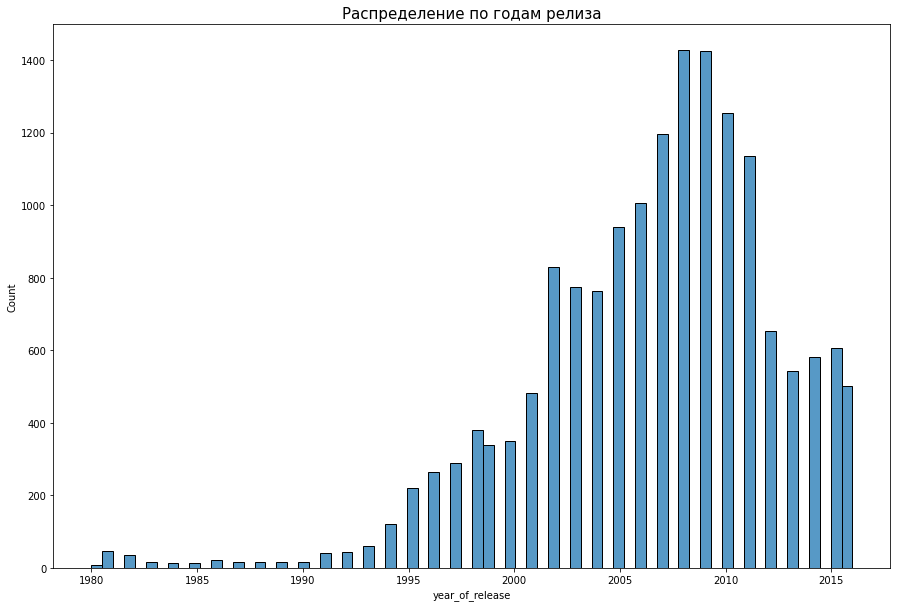

In [15]:
#Old
#hist_1 = data['year_of_release'].plot(kind='hist', bins=60, figsize = (15, 10)).legend()

#New
plt.figure(figsize=(15, 10)) 

sns.histplot(data=data['year_of_release'], bins = 70)
plt.title('Распределение по годам релиза',fontsize=15)
plt.show()


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Заметь использовать seaborn тебе не нужно самому прописывать названия осей




</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Успех:    


График построен хорошо надписи все присутствуют, figsize  подобран.  Почему это может быть важно?! Графики первое что бросается в глаза, а первое впечатление порой определяющее.    
    
    


<div class="alert alert-warning">


Совет: 

- Советую использовать [seaborn](https://habr.com/ru/company/otus/blog/540526/).  Он строит красивее, с ним можно строить техничней, он много работы сделает за тебя. 
    
 




Из гистограмм видно, что большое количество игр вышло в промежутке от 2005 до 2010 года.  
Рассматривать буду этот диапазон, т.к. популярность компьютерных игр и кол-во выпусков в этот временной промежуток наивысший.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

да, 80-90-е выглядят анахронизмом тут



</div>


**2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте**

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU']


Text(0.5, 1.0, 'Изменение продаж по платформам')

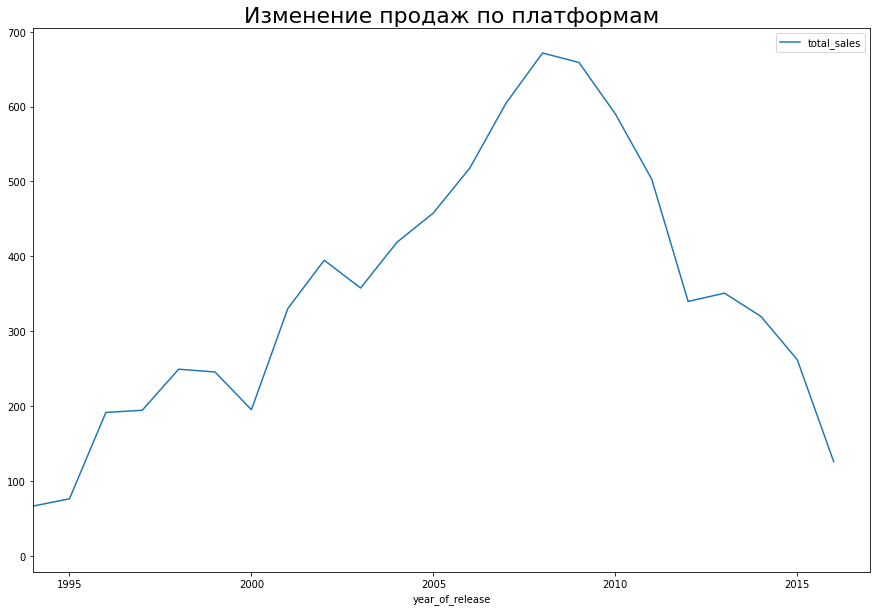

In [16]:
# В задании сказано выбрать платформы с наибольшими суммарными продажами. 
# Группирую по платформам, считаю сумму продаж, сортирую по убыванию, отсекаю всё остальное
sort_by_platform_top_20 = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).iloc[:20].index.to_list()
# Вывожу топ 20 платформ по продажам
print(sort_by_platform_top_20)

# получаю новый датафрейм, содержащий только те платформы, которые были получены в ходе сортировки,
# это топ 20 с наибольшими продажами
data_top_20 = data.loc[data['platform'].isin(sort_by_platform_top_20)]

# исключаю 2055 год
data_top_20 = data_top_20[data_top_20['year_of_release'] != 2055]

# строю график по всем платформам
data_top_20.groupby('year_of_release').agg({'total_sales':'sum'}).plot(figsize=(15, 10))
plt.xlim(1994, 2017)    
plt.title('Изменение продаж по платформам', fontsize=22)

После 2009 года кол-во продаж игр уменьшается. Пик игровой индустрии приходится на 2007 - 2008 годы. В те года вышло много игр, которые помнят до сих пор.

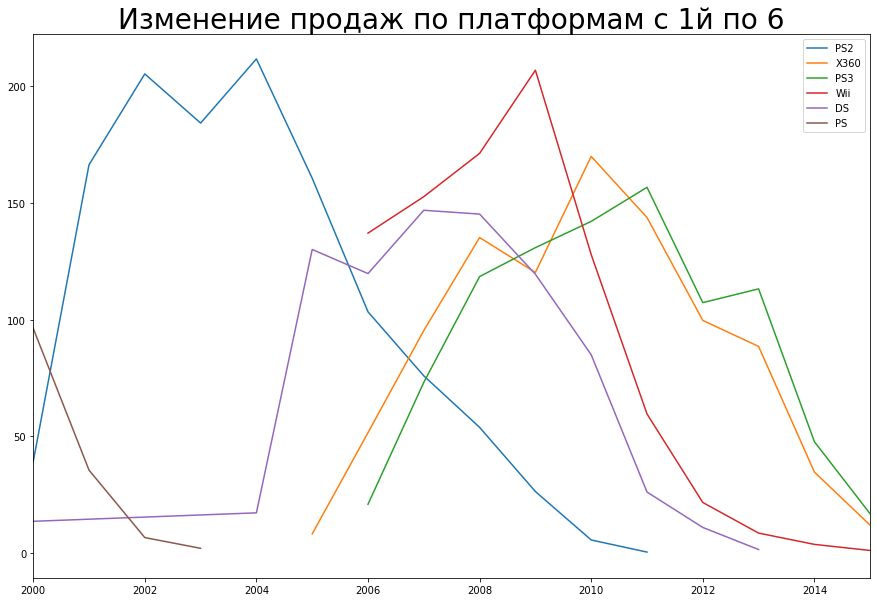

In [17]:
# Пишу цикл,в котором я смогу выбирать определённое кол-во платформ для построение графиков
plt.figure(figsize=(15, 10)) 
for x in sort_by_platform_top_20[0:6]:
    plt.plot(data_top_20[data_top_20['platform'] == x].groupby('year_of_release').agg({'total_sales':'sum'}), label= x)
    #print(x)
plt.xlim(2000, 2015)    
plt.title('Изменение продаж по платформам с 1й по 6', fontsize=28)
plt.legend()





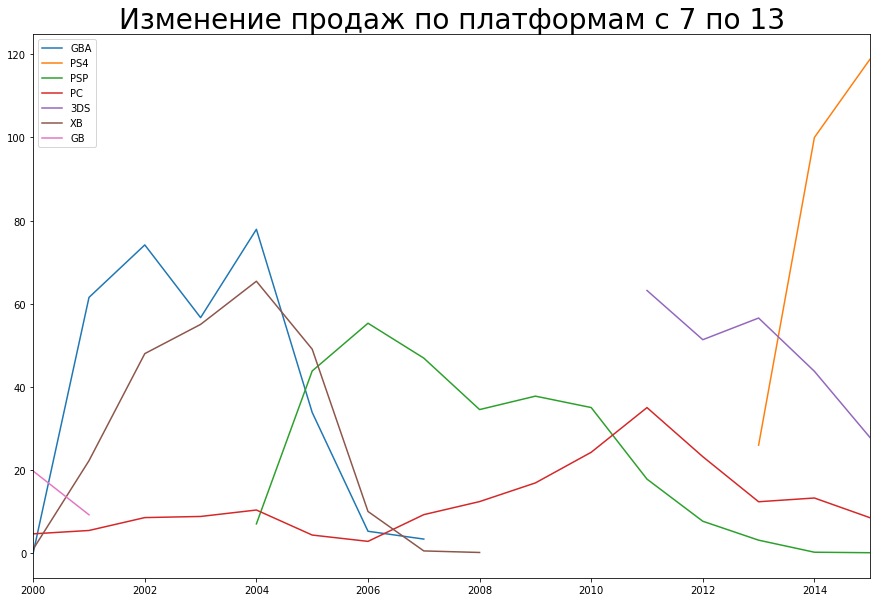

In [18]:
plt.figure(figsize=(15, 10)) 
for x in sort_by_platform_top_20[6:13]:
    plt.plot(data_top_20[data_top_20['platform'] == x].groupby('year_of_release').agg({'total_sales':'sum'}), label= x)
    #print(x)
plt.xlim(2000, 2015)    
plt.title('Изменение продаж по платформам с 7 по 13', fontsize=28)
plt.legend()

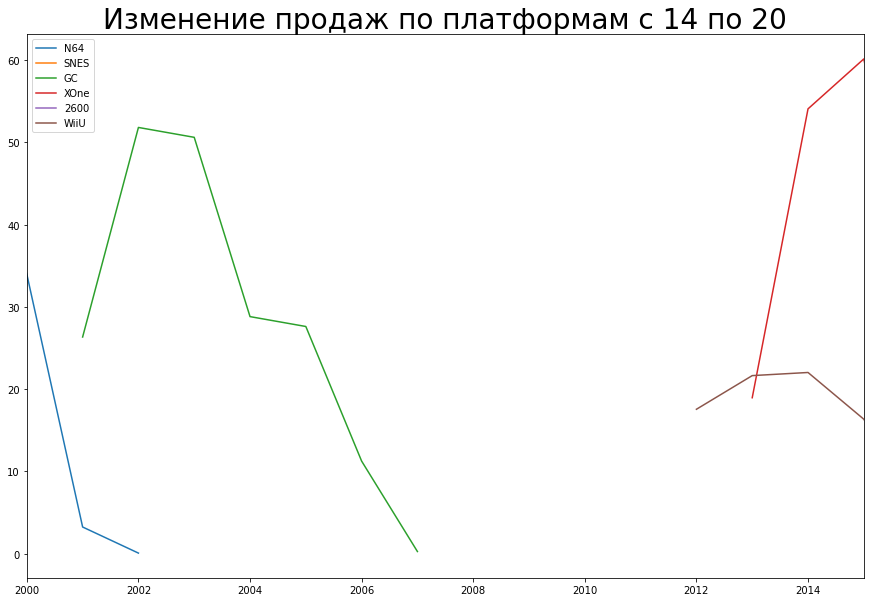

In [19]:
plt.figure(figsize=(15, 10)) 
for x in sort_by_platform_top_20[14:20]:
    plt.plot(data_top_20[data_top_20['platform'] == x].groupby('year_of_release').agg({'total_sales':'sum'}), label= x)
    #print(x)
plt.xlim(2000, 2015)    
plt.title('Изменение продаж по платформам с 14 по 20', fontsize=28)
plt.legend()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



Информативный график, и вывод о cкоротечности жизненного цикла верный  

    


<div class="alert alert-warning">


Совет: 



Как можно было найти средний цикл жизни платформ еще?
    


- Создать сводную табличку (по одной оси продажи, по другой платформы, а в качестве данных продажи), сверху наложить heatmap - будет красивенько ) 
    


**Вывод по графикам:**  
По графикам можно сказать, что каждые 2-3 года появляется новая платформа. У платформ XBOX one и ps4 растут продажи к концу графика. Это можно объяснить тем, что на тот момент они были более новыми и современными, чем их предшественники, поэтому всё больше людей пересаживаются за эти консоли и всё больше на них делают игр. Продажи wiiU и 3DS падают. WiiU  вообще была провальной констолью.   
 Актуальный период выбираю в годы, когда появились PS4 и XBOX One, т.к. на предыдущие версии консолей перестают выпускать игры. Это с 2014 года.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Посмотрены продажи, динамика и найдены платформы которые действительно стоит рассмотреть для 2017 года. 





</div>




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Для правильного выбора актуальных лет нужно было увязать требование проекта - прогноз на 2017 года, данные о жизненном цикле платформ, особенность индустрии игры, и учесть тренд. Твой выбор верный, молодец.

</div>

In [20]:
#Пишу функцию для подсчёта время жизни платформы
def life_time(platforma):
    temp_data = data[data['platform'] == platforma]
    temp_data = temp_data[temp_data['year_of_release'] != 2055]
    return temp_data['year_of_release'].max() - temp_data['year_of_release'].min()

#print(life_time('PS2'))
# создаю список и закидываю в него посчитанные года жизни консолей с помощью цикла
life_time_series = []
for x in sort_by_platform_top_20:
    life_time_series.append(life_time(x))
    
# функция mean() отказалась работать, поэтому посчитаю среднее время жизни в ручную
life_time_series_mean =  sum(life_time_series)/len(life_time_series)   
print('Среднее время существования игровой платформы:', life_time_series_mean,'лет')    

Среднее время существования игровой платформы: 10.25 лет


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 10.25 лет




</div>


**Ввожу новый датасет с актуальным периодом**

In [21]:
data_actual = data[data['year_of_release'] >= 2014]

display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01


**3.Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>   
    
Добавил графики с выбросами и дополнил выводы.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



Дорабатываешь проект, молодец




</div>


Text(0.5, 1.0, 'Глобальные продажи игр Топ-6 платформ с выбросами')

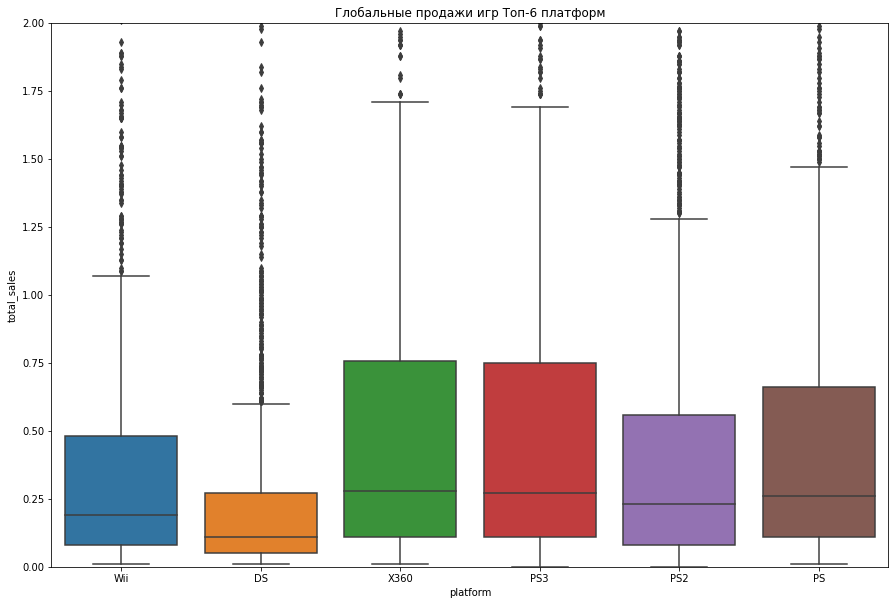

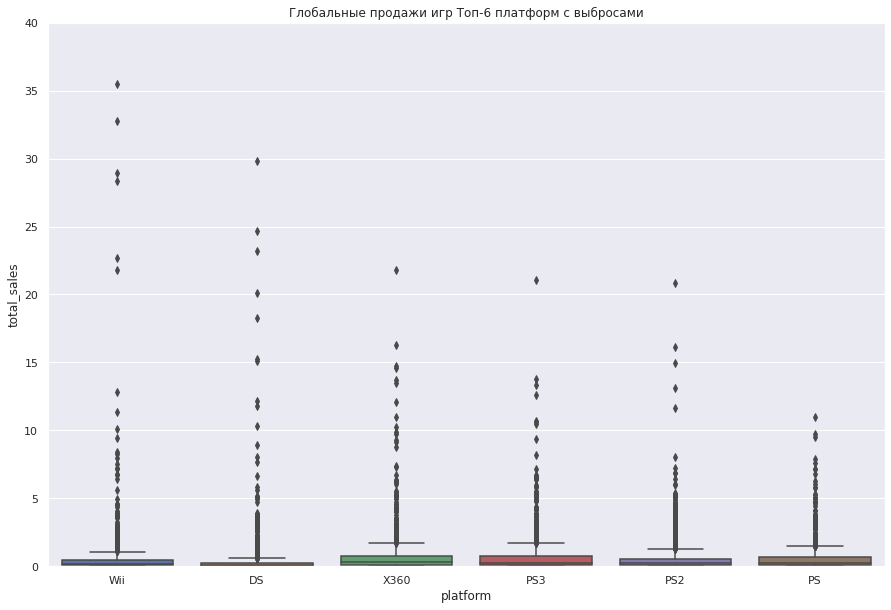

In [22]:
#Топ 6 платформ по продажам
data_for_boxplot = data[data['platform'].isin(sort_by_platform_top_20[0:6])]

plt.figure(figsize=(15, 10)) 
sns.boxplot(x='platform', y='total_sales', data=data_for_boxplot)
plt.ylim(0,2)
sns.set(rc={"figure.figsize":(17,10)})
plt.title('Глобальные продажи игр Топ-6 платформ', fontsize=12)

#Топ 6 платформ по продажам с выбросами
plt.figure(figsize=(15, 10)) 
sns.boxplot(x='platform', y='total_sales', data=data_for_boxplot)
plt.ylim(0,40)
sns.set(rc={"figure.figsize":(17,10)})
plt.title('Глобальные продажи игр Топ-6 платформ с выбросами', fontsize=12)

**Вывод по топ-6 платформам**
- у Nintendo DS довольно малый разброс, что говорит о её стабильности продаж, но в то же время максимальное кол-во было меньше всего. Так же присутствует большое кол-во выбросов, что может говорить о том, что выпущенная игра, по статистике, может превысить максимальный кол-во продаж, но они всё равно с трудом дотянут до X360 и PS2
- у Wii ситуация немного получше, но всё равно меньше, чем у лидиров рейтинга
- у X360 и PS3, практически одинаковые продажи, одинаковый разброс продаж, больше всех максимальные значения продаж. PC от них не отстаёт

Text(0.5, 1.0, 'Продажи по актуальным платформам')

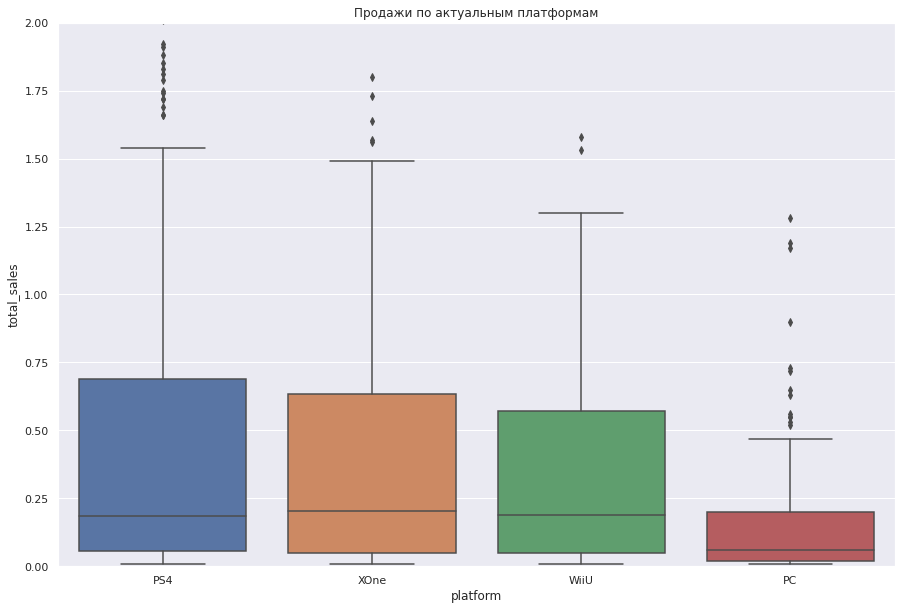

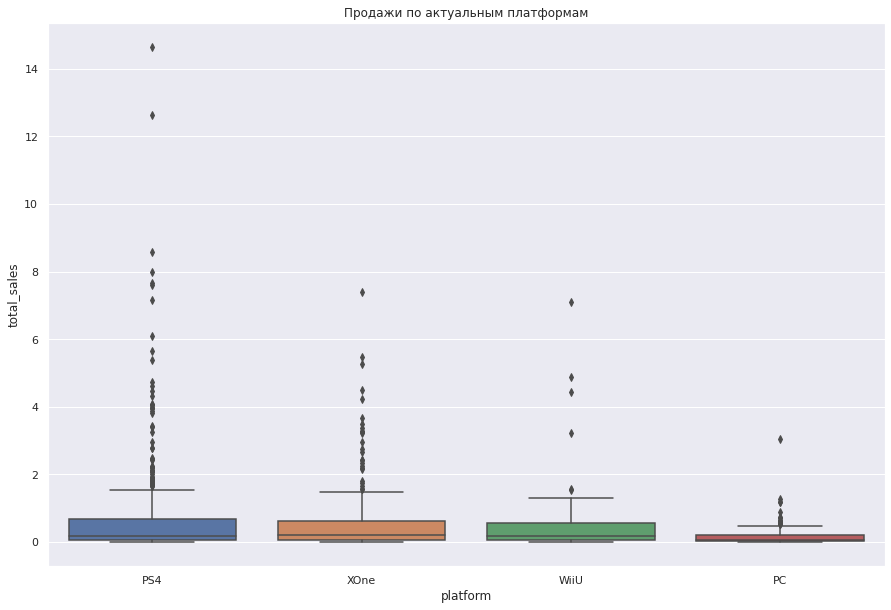

In [23]:
#Посмотрим интересующие нас консоли на актуальный период
actual_platform = ['PS4', 'XOne','WiiU', 'PC']
data_for_boxplot = data_actual[data_actual['platform'].isin(actual_platform)]

plt.figure(figsize=(15, 10)) 
sns.boxplot(x='platform', y='total_sales', data=data_for_boxplot)
plt.ylim(0,2)
sns.set(rc={"figure.figsize":(17,10)})
plt.title('Продажи по актуальным платформам', fontsize=12)

#С выбросами

plt.figure(figsize=(15, 10)) 
sns.boxplot(x='platform', y='total_sales', data=data_for_boxplot)
#plt.ylim(0,40)
sns.set(rc={"figure.figsize":(17,10)})
plt.title('Продажи по актуальным платформам', fontsize=12)

**Вывод по актуальным платформам**
- Лидирует PS4, от него совсем немного отстаёт XOne, у PS4 довольно большое кол-во выбросов, из чего можно сделать вывод, у многих игр число продаж превысило максимальное значение
- PC меньше всего максимальная продажа, но более стабильный разброс этих продаж, т.к. размах самый маленький, среди остальных
- WiiU имеет немного меньший разброс и максимально число продаж, по сравнению с первыми двумя платформами, в то же время у него меньше всего выбросов, что говорит о том, можно не расчитывать на большее число подаж, чем планировалось.



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- График построен верно, но есть одно важное замечание. Результат твоей работы пойдет дальше, например в отдел маркетинга, и там люди вряд ли скажут спасибо за график на котором не видны медиана и квантили. Твой график хорош тем что видны выбросы, они важны, это супермега популярные игры, которые и вытягивают продажи. Но также данный график нужен для сравнения платформ, а на твоем графике такой анализ выполнить затруднительно.  Решением тут будет построить два графика, один с ограниченными данными (без выбросов, чтобы оценить квартили по платформам)  и график с полными данными (для оценки выбросов).
 
    
    
- Советую  построить для 5-6 наиболее продаваемых платформ    
</div>



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Теперь медианы и квантили видны, но выбросы не все, это недостаток. Достаточно было построить ещё один график убрав plt.ylim(0,2)  
</div>


**Вывод по графикам**
- У PS2,PS3 X360, PC, DS, Wii, имеются большое кол-во выбросов, на эжтих платформах выходили ААА игры, которые имели сильную рекламную кампанию, поэтому их покупало больше людей, чем остальные игры
- nes,gb, и gen имеют довольно большой межквартильный размах, из этого делаю вывод, что разброс продаж на этих платформах довольно высок
- проанализировав выбросы в топ - 6 платформ, можно заметить, что у игровой платформы Wii и DS некоторые игры имели наибольшие число продаж, по сравнению состальными, но это единичные продукты. Что же по кол-ву сверх успешных игр по продажам, превысивших максимальное значение в целом на остальных платформах они не сильно отличаются друг от друга, но у PC их поменьше
- что же по актуальным платформам, у PC меньше всех сверх успешных продаж, чем у консолей. По сверх успешным продажам лидирует PS4.
 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Совет: 


Как видишь для всех платформ медиана ближе к нижнему квантилю, а верхний очень далек, плюс выбросы. Отсюда можем сделать вывод не только что где то больше, где то меньше продажи, где то большая вариативность игры по продажам, где то меньше, но и то что у нас в интервале с небольшими продажами находится очень много игр, а есть суперпупермега популярные игры (выбросы),   продажи которых могут быть выше чем остальные игры вместе взятые. Характеристика это игровой отрасли? Еще какая.    

</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка:
    
Boxplot позволяет сравнивать не только по медианам, и сравнивать размахи.

Еще boxplot позволяет сделать выводы о плотности распределения и квантилям.  Стоит добавить анализа, иначе зачем нам вообще boxplot !? 

Вопросы, ответы на которые помогут дополнить вывод:

1. Что общего у плотностей распределений всех платформ (обрати внимание на то к чему ближе медиана - к верхнему или нижнему квантилю)?

2. Ответив на первый вопрос, можно ли сказать - преобладают ли у нас игры с небольшими продажами и небольшим числом мегапопулярных игр, или наоборот.  

Чтобы лучше понять, что отображает боксплот, рекомендую со следующим материалом ознакомиться

https://stepik.org/lesson/9294/step/4?unit=1827

И вот рисуночек:


![Ящик с усами](https://ucarecdn.com/c476e686-fb7b-4e8a-b9d3-54d3b461bb44/)



</div>




**4. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [24]:
print(sort_by_platform_top_20)
display(data)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No rating,0.01


In [25]:
current_period = data[data['year_of_release'] >= 2014]

current_period['critic_score'].unique()



array([nan, 97., 82., 83., 85., 87., 88., 76., 93., 81., 86., 84., 77.,
       80., 92., 70., 72., 75., 66., 78., 89., 73., 90., 74., 71., 79.,
       68., 63., 61., 64., 91., 69., 96., 62., 55., 95., 67., 65., 50.,
       60., 56., 58., 46., 59., 57., 48., 32., 54., 47., 53., 51., 49.,
       45., 39., 19., 44., 43., 20., 36., 40., 42., 25., 35., 52., 31.,
       26.])

PS2 Зависимость от оценки критиков: nan
PS2 Зависимость от оценки пользователей: nan
X360 Зависимость от оценки критиков: 0.5257228356581523
X360 Зависимость от оценки пользователей: -0.138444570945665
PS3 Зависимость от оценки критиков: 0.44657460493190704
PS3 Зависимость от оценки пользователей: -0.16676141347662118
Wii Зависимость от оценки критиков: nan
Wii Зависимость от оценки пользователей: 1.0
DS Зависимость от оценки критиков: nan
DS Зависимость от оценки пользователей: nan


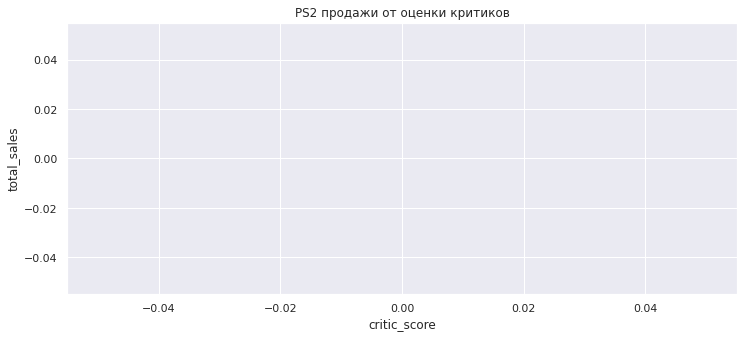

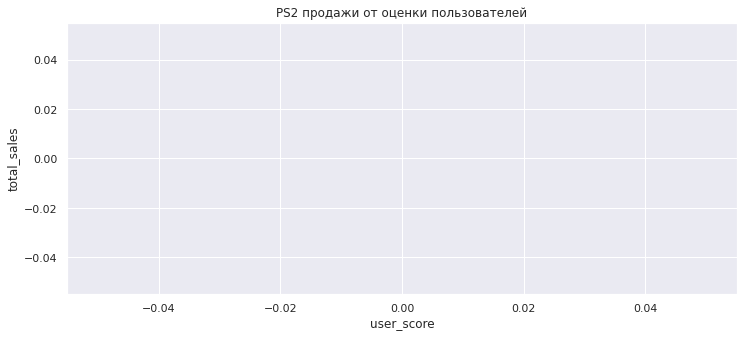

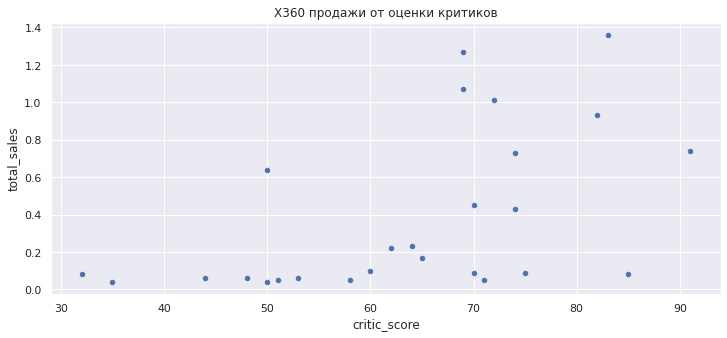

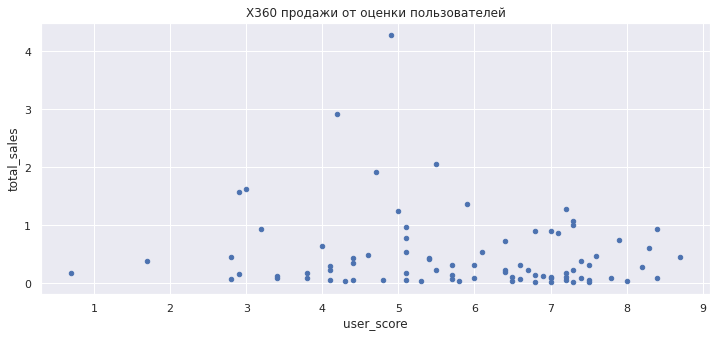

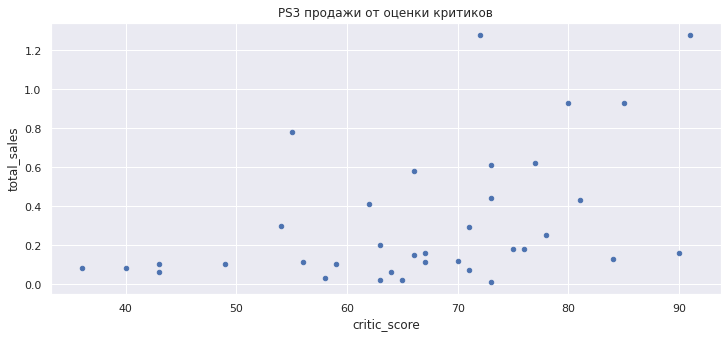

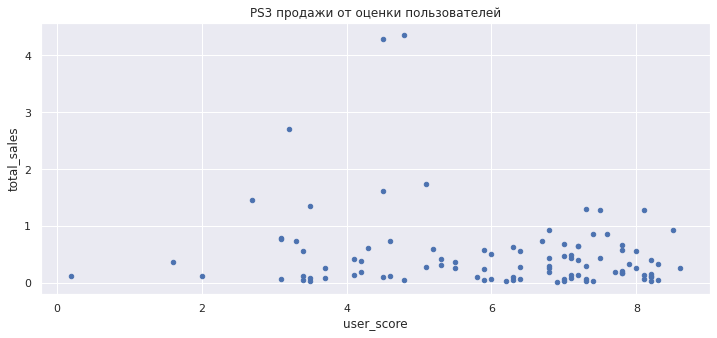

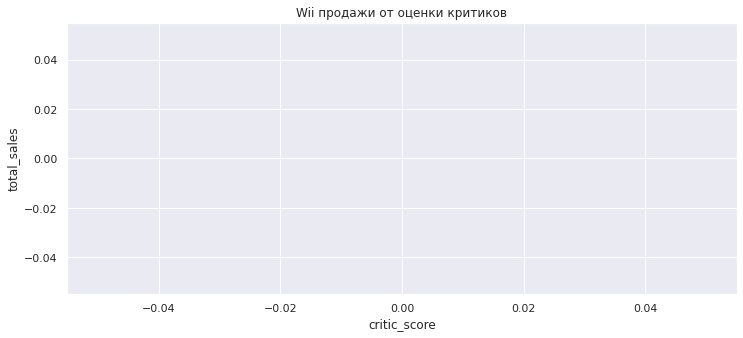

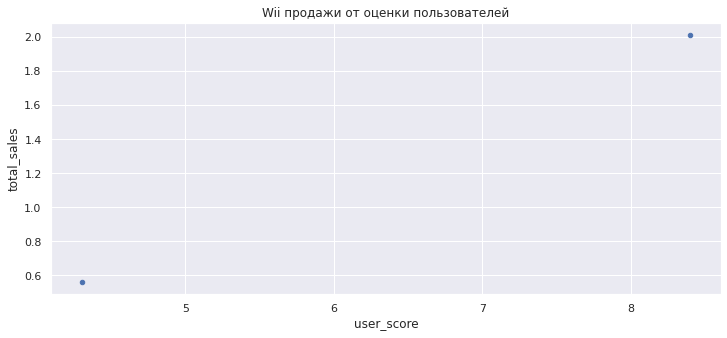

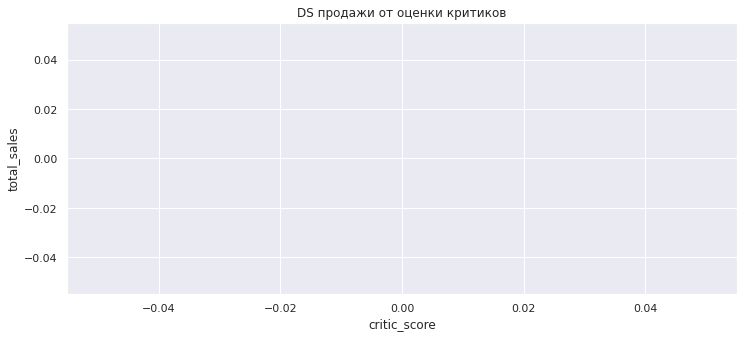

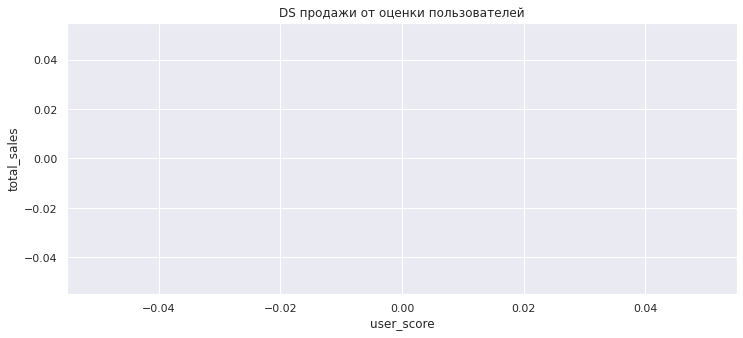

In [26]:
#Делаю цикл для вывода графиков корреляции и их подсчёта
matplotlib_axes_logger.setLevel('ERROR')

for x in sort_by_platform_top_20[0:5]:
    filtered_df = current_period[current_period['platform'] == x]
    critic_title = str(x)
    critic_title += ' продажи от оценки критиков'
    filtered_df.plot(x= 'critic_score', y = 'total_sales',title = critic_title,
          kind = 'scatter', grid=True, figsize=(12, 5), )
    user_title = str(x)
    user_title += ' продажи от оценки пользователей'
    filtered_df.plot(x= 'user_score', y = 'total_sales',title = user_title,
          kind = 'scatter', grid=True, figsize=(12, 5))
    
    cor_critic = filtered_df['critic_score'].corr(filtered_df['total_sales'])
    print(x,'Зависимость от оценки критиков:',cor_critic)
    cor_cuser = filtered_df['user_score'].corr(filtered_df['total_sales'])
    print(x,'Зависимость от оценки пользователей:',cor_cuser)



**Вывод по графикам**

- У популярных консолей, таких как PS2, X360, PS3 видна средняя корреляция от оценки критиков, довольно низкая - от оценки польщователей. Критикам обычно раньше достаются игры, они выставляют ей оценку. Выбор многих пользователей зависит от первого обзора и оценки на игру.
- У Wii и Ds довольно низкая зависимость продаж от оценок

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



+  запуск в цикле

+ отсутствие корреляции между отзывами клиентов и продажами подчеркнута правильно 

+ графики оформлены аккуратно 

+ метод .corr() использован




<div class="alert alert-warning">


Совет: 




- sns.pairplot можно использовать, будет красиво



Вопросики, пожеланию можешь ответить )



- Можешь предположить почему корреляция продаж с отзывами критиков выше, чем с отзывами пользователей?


- Можешь вспомнить, только какой тип связи может выявить корреляция Пирсона?


- Можно ли утверждать о отсутствии связи при близких к нулю показателях корреляции?


- Можно ли утверждать о причинно-следственной связях при высоких значениях корреляции?


- Можешь используя графики выявить нелинейные связи?




</div>







**Попытаюсь ответить на вопросы**

1. Я немного затрагивал это в выводе, рейтинги критиков обычно появляются раньше релиза игры и о них больше говорят, что является своим родом рекламой игры. В некоторых играх на обложку пишут рейтинги издателельств, чтобы показать на сколько игра крута
2. Коэффициент корреляции показывается на сколько пропорционально изменчивость 2х переменных.
3. На сколько я знаю, при значении -1 у нас полное отсутствие корреляции, при 0 связь может быть, но слабой.
4. Я думаю, что да. Действие одной велечины меняет другую.
5. Вроде в графике "PS3 продажи от оценок пользователей" присутствует небольшой перегиб в центре, по нему можно сказать, что смотрят на высокие и низкие оценки, а на средние не обращают внимание.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

1. Затрагивал, да. Что ты написала - такое вполне возможно. А ещё может быть что оценки пользователей это обычные боты, накрутки, а критики это все таки люди конкретные, с именами и фамилиями, их отзывы не вбросишь.
    
    
2. Корреляция Пирсона говорит лишь о линейной связи между данными
        
   
3. Даже если Пирсон показывает 0, рано говориь что связи нет, ведь связь может быть более сложной (нелинейной), которую Пирсон в силу своих ограничений (ловит только линейне связи) может не уловить   

    
4. Нет,  что причина, а что следствие мы понятия не имеем. Более того причиной может быть какой то третий фактор
     
    
5. Верно рассуждаешь. Я вижу  так  - пока рейтинг ниже 80, нет прямой зависимости между ростом оценок и продаж, а после 80, большему рейтингу начинают соответствовать большие продажи - вот такой вид нелинейной связи.
     
    
</div>

**5. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Используем датасет с актуальными годами. Потому что наша задача дать рекомендации на 2017 год, а для этого нам не  нужны годы с неактуальными тенденцими.    


</div>

Text(0.5, 1.0, 'Распределение продаж по жанрам')

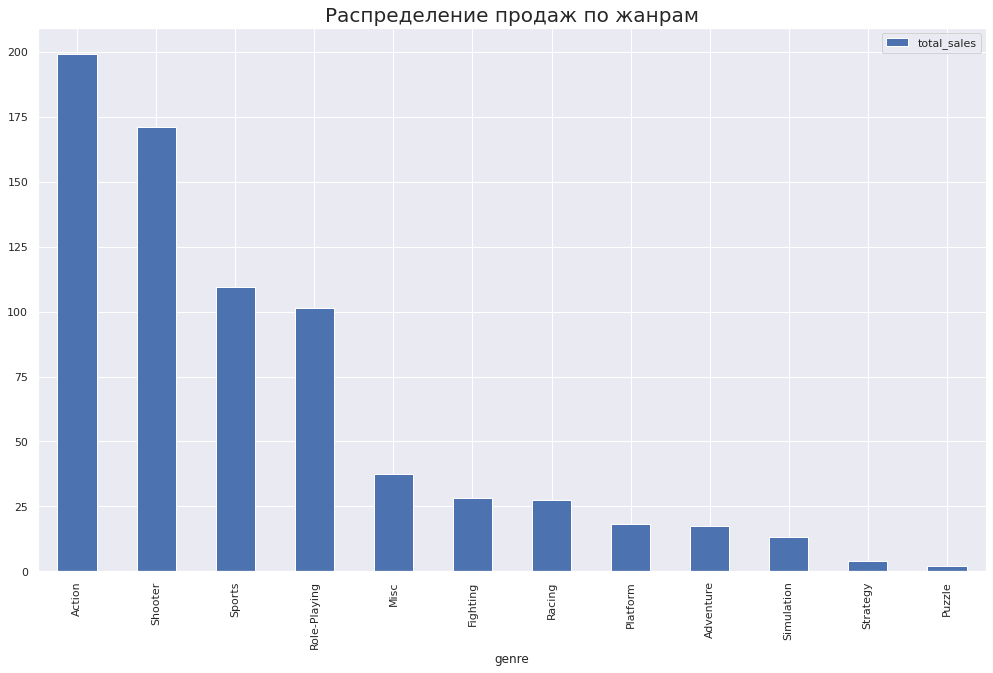

In [27]:
data_actual.groupby(by ='genre').agg({'total_sales':'sum'}).sort_values(by= 'total_sales', ascending=False).plot(kind='bar')
plt.title('Распределение продаж по жанрам', fontsize=20)


Text(0.5, 1.0, 'Распределение средних продаж по жанрам')

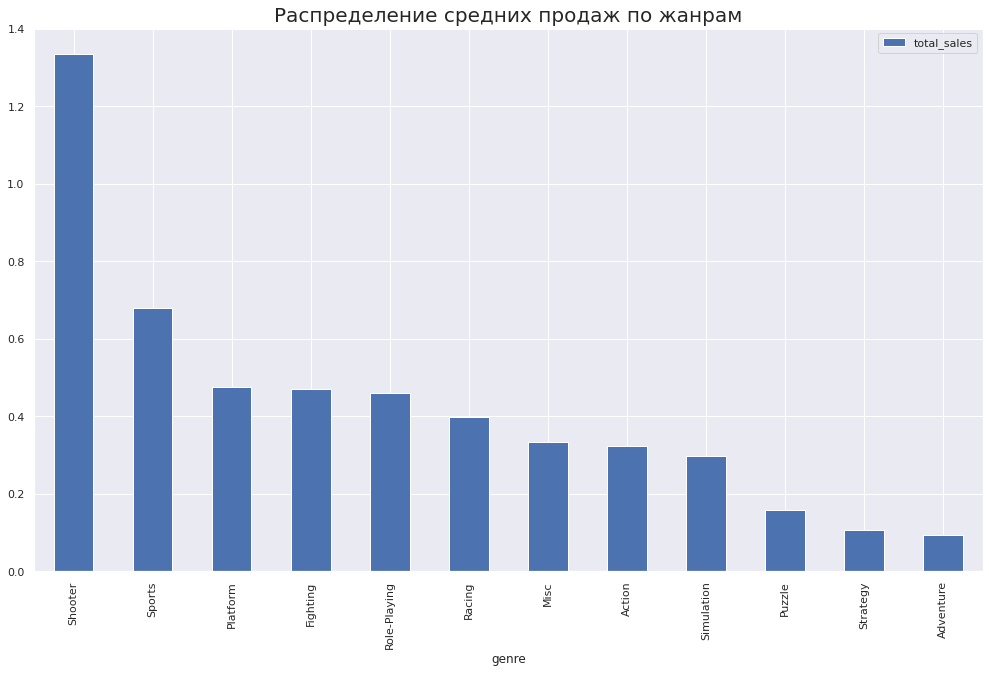

In [28]:

data_actual.groupby(by ='genre').agg({'total_sales':'mean'}).sort_values(by= 'total_sales', ascending=False).plot(kind='bar')
plt.title('Распределение средних продаж по жанрам', fontsize=20)

**Вывод по распределению по жанрам**

- Самый прибыльный жанр Action, Sports и Shooter
- Пазлы, приключения и стратегии выделяются самыми низкими продажами
- В то же время по средним продажам выделяется Shooter, у него почти средняя продажа в 2 раза выше, чем у идущего следующего жанра

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно, причем я считаю что средние продажи важнее. Поэтому стоит сконцентрироваться на играх жанра шутер, ведь мы продаём конкретные игры, а не жанры




</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Верно ли ограничиваться сравнением суммарных продаж по жанрам?! На какие множители можно разложить полученный результат?! Это средняя продажа игр в этом жанре на количество игр в этом жанре. То есть за высокими продажами какого-то жанра могут скрываться множество мелких игры, с низкими продажами. А за низкими суммарными продажами в жанре может скрываться небольшое число игры, но каждая из которых имеет высокие доходы.  Посмотри на средние продажи (aggfunc='mean') и оцени, как поменяются лидеры.


</div>



# Шаг 4.  Составьте портрет пользователя каждого региона

**Самые популярные платформы**

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Используем датасет с актуальными годами.


</div>

Text(0.5, 1.0, 'Топ 5 платформ в Японии')

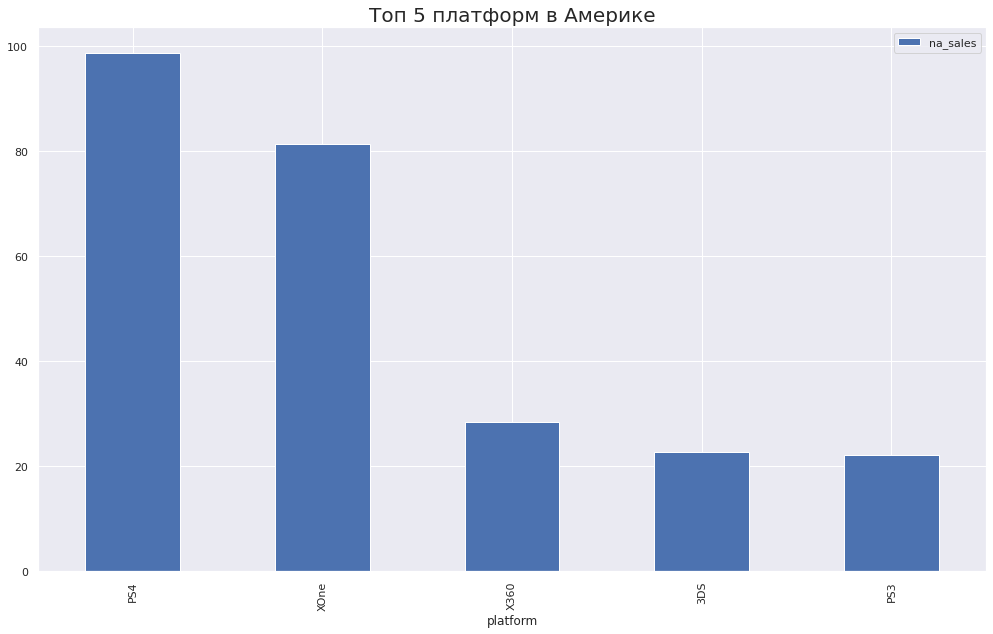

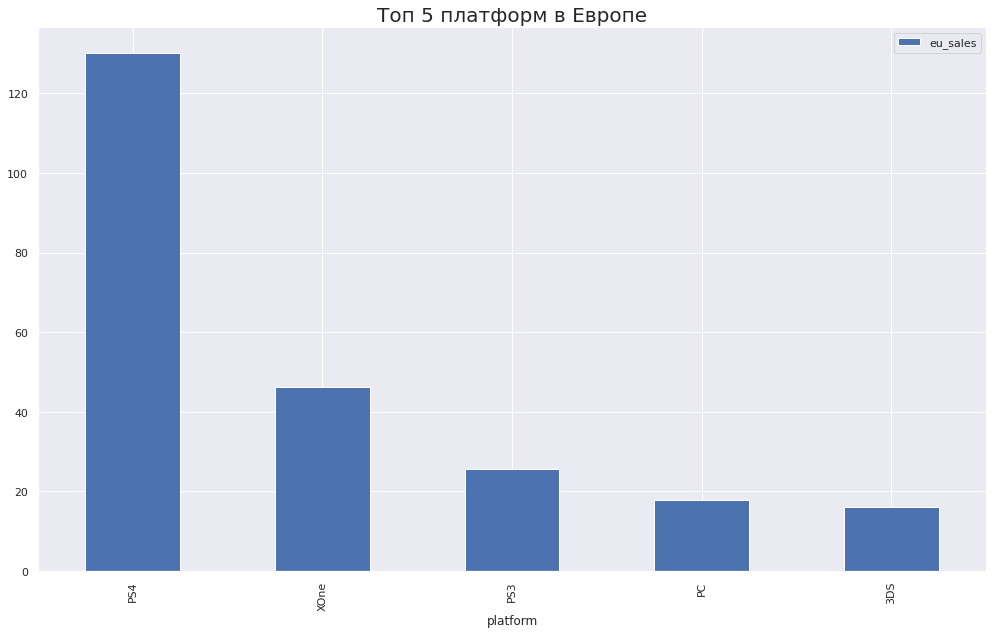

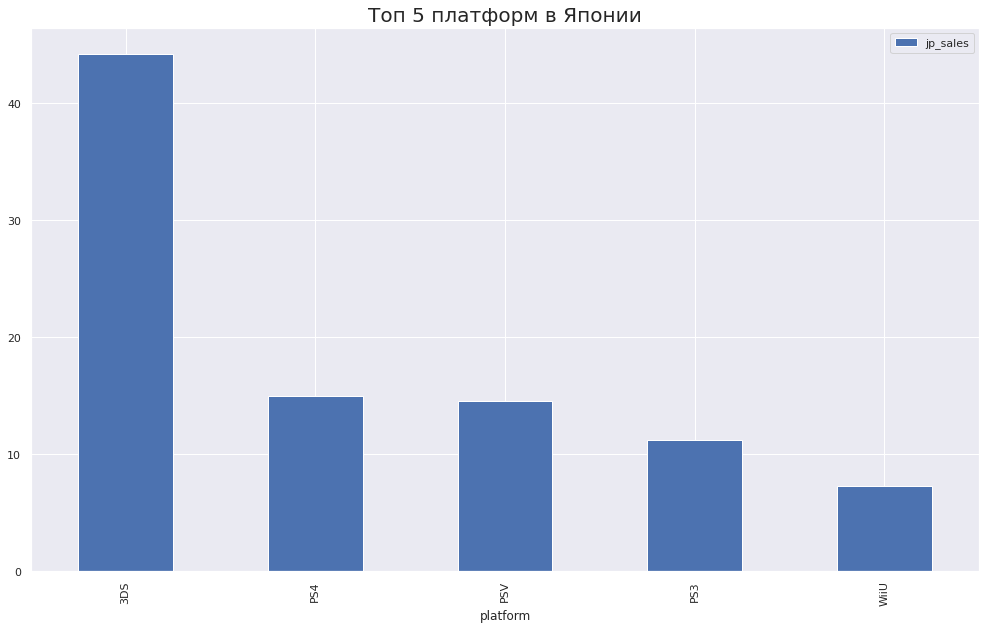

In [29]:
data_actual.groupby(by ='platform').agg({'na_sales':'sum'}).sort_values(by= 'na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ в Америке', fontsize=20)

data_actual.groupby(by ='platform').agg({'eu_sales':'sum'}).sort_values(by= 'eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ в Европе', fontsize=20)

data_actual.groupby(by ='platform').agg({'jp_sales':'sum'}).sort_values(by= 'jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 платформ в Японии', fontsize=20)



**Вывод по платформам**  
- В Америке самая популярная платформа, за актуальный период это PS4, следом идёт с небольшим отставаниием XOne
- В Европе - PS4, у XOne продажи в 2.5 раза меньше
- В Японии - Nintendo 3DS лидирует

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 понятный график. 



**Самые популярные жанры**

Text(0.5, 1.0, 'Топ 5 жанров в Японии')

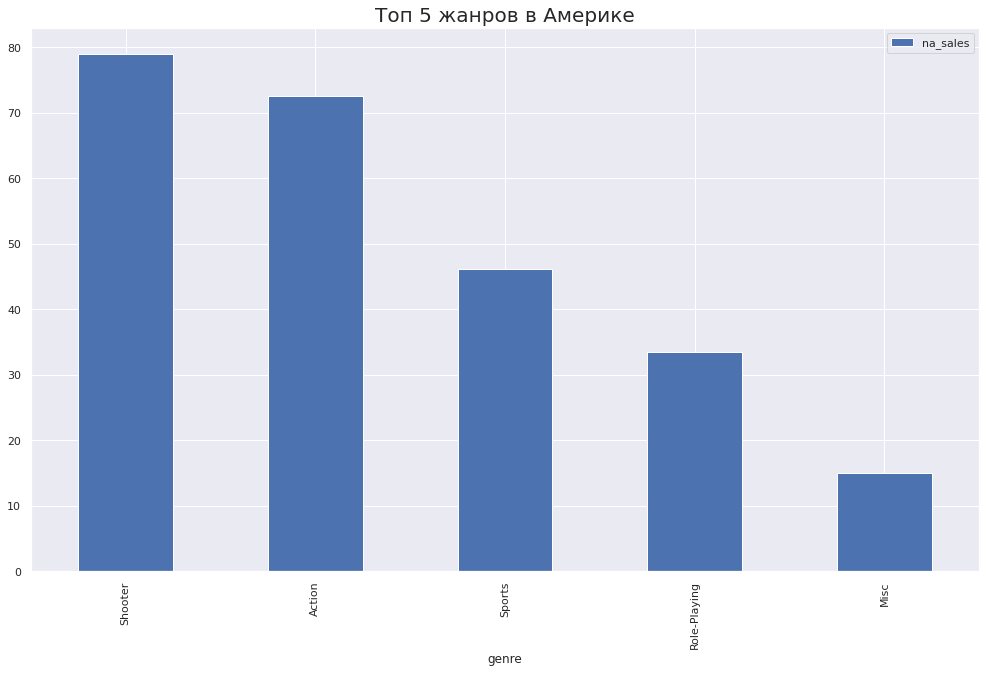

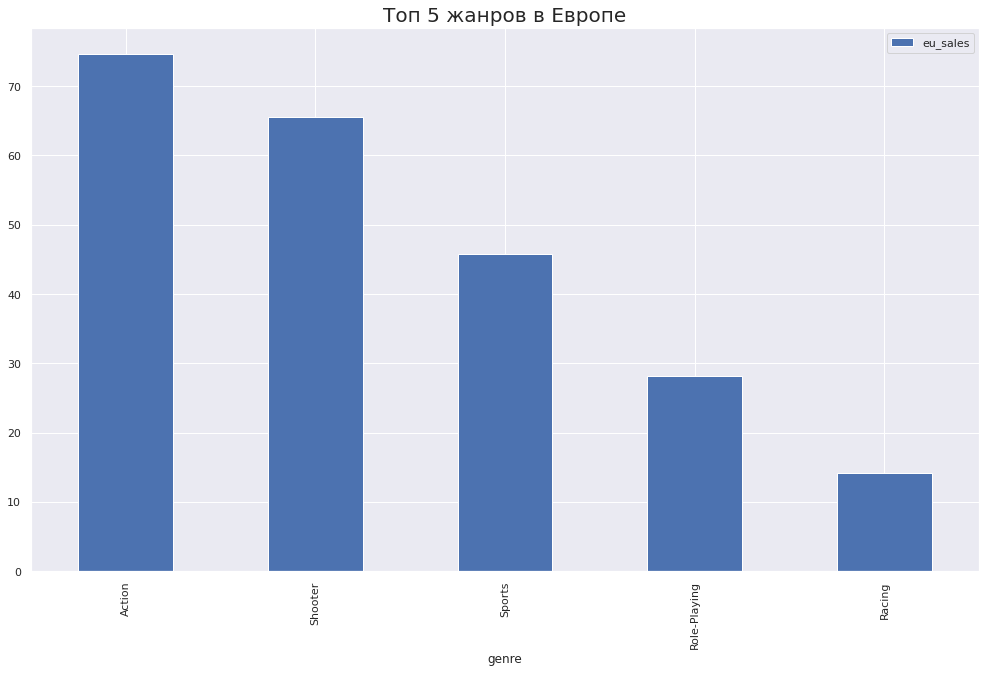

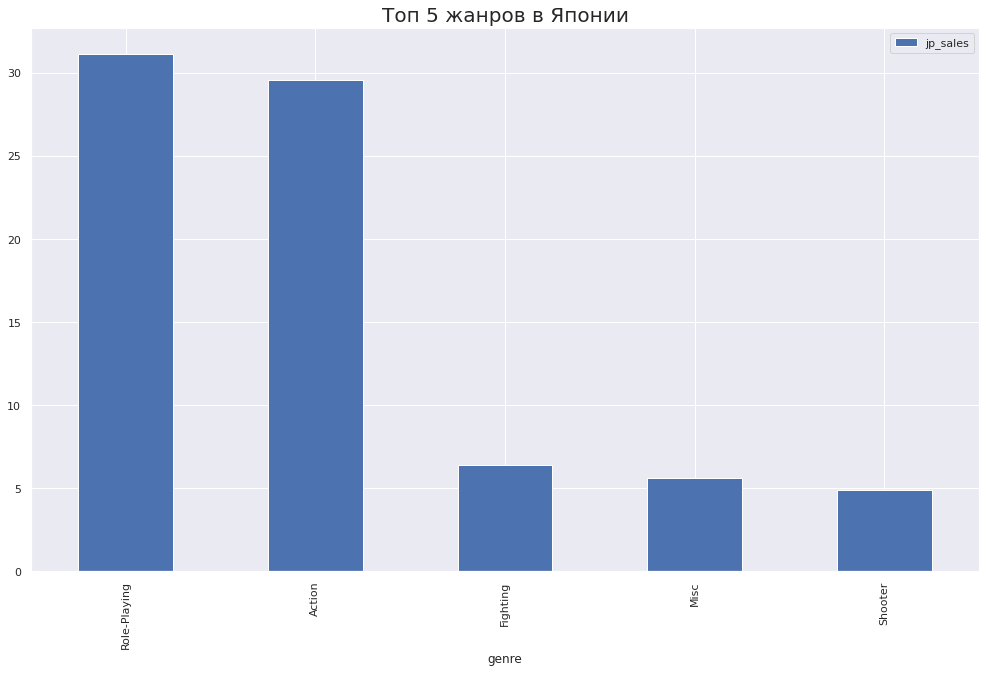

In [30]:
data_actual.groupby(by ='genre').agg({'na_sales':'sum'}).sort_values(by= 'na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 жанров в Америке', fontsize=20)

data_actual.groupby(by ='genre').agg({'eu_sales':'sum'}).sort_values(by= 'eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 жанров в Европе', fontsize=20)

data_actual.groupby(by ='genre').agg({'jp_sales':'sum'}).sort_values(by= 'jp_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Топ 5 жанров в Японии', fontsize=20)


**Вывод по жанрам**  
- У Америки и Европы мнение почти едино, любят играть. В Акшен, Спортивные игры и Шутеры
- В Японии в топе ролевые игры и Экшены

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Япония на своей волне ) И жанры другие и платформы и доля играющих среди тинейджеров выше
</div>

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [31]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No rating,0.01


Text(0.5, 1.0, 'Распределение продаж по рейтингу в Японии')

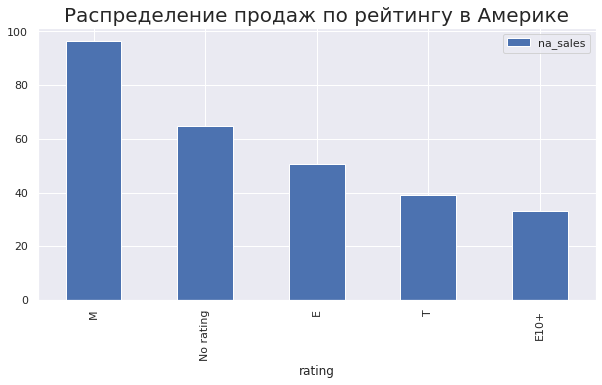

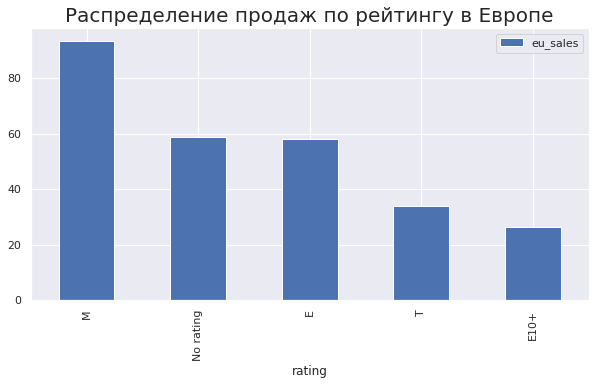

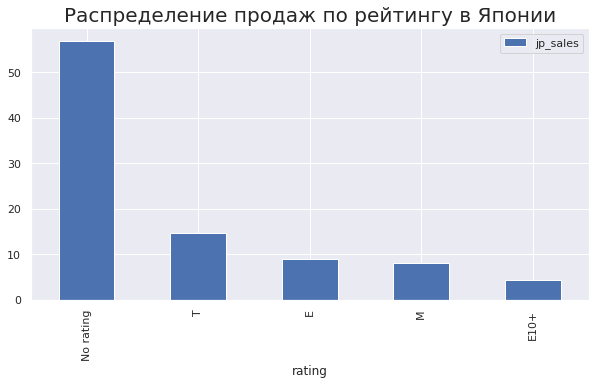

In [32]:
data_actual.groupby(by ='rating').agg({'na_sales':'sum'}).sort_values(by= 'na_sales', ascending=False).plot(kind='bar',figsize = (10,5))
plt.title('Распределение продаж по рейтингу в Америке', fontsize=20)

data_actual.groupby(by ='rating').agg({'eu_sales':'sum'}).sort_values(by= 'eu_sales', ascending=False).plot(kind='bar',figsize = (10,5))
plt.title('Распределение продаж по рейтингу в Европе', fontsize=20)

data_actual.groupby(by ='rating').agg({'jp_sales':'sum'}).sort_values(by= 'jp_sales', ascending=False).plot(kind='bar',figsize = (10,5))
plt.title('Распределение продаж по рейтингу в Японии', fontsize=20)


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:


Та же ошибка,  пропали игры для которых не присвоен рейтинг. Получается искажённая картинка, ведь их доля очень велика, особенно для японского рынка

</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Следствие ошибка, которая была допущена, при не заполнении пропусков в столбце "rating": на графиках не отобразились данные о играх без рейтинга, но продажи именно этих игр могут указать на ключевое различие в регионах или поменять пропорции. Стоит заполнить пропуски в столбце "rating", каким то смысловым маркером и пересчитать результаты, при необходимости поправив выводы.
</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>   
    
Дополнил вывод про Японию. Так же, получив новые данные, дополнил общий вывод. В самом конце будет ещё один мой комментарий.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:


Принято. 
    
    
Тут можно даже написать о необходимости дополнительного сбора информации, для корректного ответа на вопрос о взаимосвязи рейтинга и продаж. Я вижу так )




</div>

**Вывод по рейтингу ESRB**  
- В Европе и Америке лидирует рейтинг M - для взрослых, за ним идёт без рейтинга и Е - для всех
- В Японии в топе рейтинг игры, помеченные в датасете как No Raating. Т.к. в японии занимается рейтингом не `ESRB` а `CERO`, у них другое наименование рейтинга по возрасту. Такие данные отсутствуют в данном датасете.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 



- Когда наши действия начинают повторяться больше двух раз, стоит задуматься о введении: цикла, функции (функции с циклом). Будет и четче и компактней.  О чем я? Вот смотри - у тебя для каждого региона, по сути один и тот же код, хороший код, читабельный код ... но код который повторяется. Вся разница лишь в использовании разных аргументов ("north_america_sales", "europe_sales", "japan_sales"). Тут прямо напрашивается использования цикла



- Когда ты строишь несколько однотипных графика, то можно использовать [subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html). Это когда мы берем один "холст" на котором размещаем нужные нам графики рядом друг с другом. Это и визуально выглядит лучше и возможность строить однотипные графики в цикле. Тут бы это хорошо подошло.





- Допустим мы хотим cделать группировку и вывести в процентах. Мы можем взять сумму (sum), среднюю (mean)...но чтобы сделать проценты, придётся поработать похитрее (схема):
    
        (df_current                     
        .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]   
        .agg('sum')                                                
        .apply(lambda x: round(x / float(x.sum()), 2))     # вот это считает проценты        
        ).reset_index()     

    
Лямбда функция это очень просто, ты ведь знаешь про самописные функции? Так вот лямбда это "функция на лету", можно написать функцию, а можно лямбду, аналогии очевидны:
    
        def add_(x):
            return x+3

и аналог    

        lambda x: x+3 

Как видишь мы не создаем функцию, не присваиваем ей имя, не пишем return, мы просто быстренько сделали неименованную функцию - лямбду, потому что больше она нам не понадобиться, а аргумент x и там и там один и тот же и делаем мы с ним одно и тоже.      
  
    

- Рейтинги `E`, `T`, `K-A` итд  могут нам ничего не говорить,  тавай сделаем замену: E  ----->  Для всех, M ------>   17 лет итп. Обычно используют для этого словарь с заменами и .map (схема):



        ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех', 'unknown': 'Не известен',....}
        df_current['ESRB_description'] = df_current['rating'].map(ESRB_dict)








Это не обязательное требование, если есть желание можешь попробовать что то реализовать, нет - я приму работу и так ;)


</div>

# Шаг 5.  Проверьте гипотезы

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Используем датасет с актуальными годами. 

</div>

**Гипотезы 1:**

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
H1: Средние пользовательские рейтинги платформ Xbox One и PC разные;

In [33]:
data_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [34]:
alpha = 0.05

x_one = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'] > 0)]['user_score']
pc = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'] > 0)]['user_score']

results = st.ttest_ind(x_one, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



Правильно:
 
+ сформулирована нулевая и альтернативные гипотезы

+ правильно выбрана статистика

+ метод 

Полученные результаты верны, но только для твоей выборки с неверными актуальными годами. После внесения исправлений результаты тестов будут несколько другими, прошу подправить выводы.


</div>


**Гипотезы 2:**

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;  
H1: Средние пользовательские рейтинги жанров Action и Sports разные;

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


- Верно сформулировал гипотезой
    
    
- Использовал актуальный dataset    




</div>




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



- не верно сформулированы гипотезы. H0 это  гипотеза которую мы принимаем за верную, а принять за верную мы можем только равенство рейтингов, иначе мы никак не сможем оценить меру случайности существующего неравенства. Тема проверка гипотез вызывает много вопросов у студентов, тут главное понять суть. Мне помогло это [видео](https://www.youtube.com/watch?v=SmReaN-Kn-g&ab_channel=%D0%93%D0%BB%D0%B5%D0%B1%D0%9C%D0%B8%D1%85%D0%B0%D0%B9%D0%BB%D0%BE%D0%B2), первые 20 минут о p-value. Я понял суть и дальше все потихоньку раскрутилось.   




</div>


In [35]:
data_actual['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [36]:
action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'] > 0)]['user_score']
sports = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'] > 0)]['user_score']

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


# Шаг 6.  Общий вывод

**Предобработка**
- исправлен тип данных в столбцах с датой релиза
- убрано тестовое значение tbd ячеек, исправлен тип данных
- в колонке `rating` убраны рейтинги EC и K-C, т.к. сейчас они относятся к E - для всех. Пропуски заполнены фразой `No rating`


**Вывод и рекомендации**

- поправить алгоримтм заполнения рейтинга  `ESRB` , чтобы он записывал возрастные рейтинги EC и K-C в E.
- забыли внести Японский возрастной рейтинг. За Японский рейтинг отвечает организация `CERO` 
- если разработчик хочет успешные продажи на 2017 год, ему стоит выбирать PS4 или XONE платформы, т.к. у них довольно высокий уровень продаж + они являются актуальными и имеют нормальную стабильность по продажам.
- жанр игры лучше выбирать Shooter или Action, т.к. в большинстве регионов довольно высоки продажи игр с эти жанром
- возрастной рейтинг делать M - для взрослых или E - для всех, т.к. большинство популярных игр имели этот рейтинг



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Принято.  Краткость сестра таланта )




</div>





<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод побьемней (добавить пару слов о данных, работе с ними, рекомендации и предположения выявленным закономерностям), чтобы он соответствовал твоей классной работе.

    
    
- Стоит добавить конкретные рекомендации
    

- Стоит разбить общий вывод на логические блоки: данные, проверка гипотез, корреляция итп

    
- После исправления красных комментариев выше надо будет ещё раз пробежать его взглядом.



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Самое большое впечатление от твоего проекта - старательность при выполнении работы над ним, не пожалел ни времени, ни усилий. Очень тщательный подход к очистке данных, бережное отношение к ним, буквально ничего не пропало. Все промежуточные и основные выводы сделаны, инструменты и методы модуля использованы оптимально.  
Ты умело применяешь графические библиотеки (matplotlib / seaborn), выбираешь для визуализации ровно те типы графиков, которые нужны, используешь subplot и циклы для автоматизации. Оформление графиков очень аккуратное.


Константин, отмечаю уровень твоей программистской подготовки, - ты используешь продвинутые концепции языка Python и библиотеки pandas, всё это делает более читабельным твой код и одновременно показывает твой уровень владения инструментами.


Используешь циклы - верно, так код будет лаконичней и читабельней

Исопользование самописной функции - продолжай в том же духе, так твой код будет выглядеть красивей и компактней.


Советую пользоваться возможностями питона, который позволяет избегать излишнее использование циклов, apply, map итп. Питон вообще такой язык, на котором, если поискать, почти всегда найдется метод или библиотека чтобы написать решение чуть ли не в одну строчку. Не всегда такое возможно, но стремиться стоит.




С комментированием кода тоже никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей.





Остались небольшие недоработки. Стоит доделать: 


- Заполнить пропуски в `rating`, чтобы получить корректный результат при анализе влияния `rating` на продажи. 

- Исправить `график boxplot`  с соответствии с моими комментариями

- Дополнить `вывод` по boxplot 

- Добавить анализ `средних` продаж по жанрам.

- При проверке гипотез и когда составляем портрет пользователя и сомтрим прибыльность жанров используем датасет с `актуальными годами`

- Переформулируем `гипотезы`  

- "В свете вновь открывшихся обстоятельств" `поправить` выводы где это необходимо    

- Сделать финальный вывод более `обьемным и структурированным` (как и графики, общий вывод это лицо проекта) 




Уверен, тебе не составит большого труда внести исправления. Жду их, для принятия проекта. Удачи 😀

</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    


Что осталось из красного: Константин я не нашёл никакого объяснения оставленным пропускам в рейтинг, которые я пометил как красное. Или обоснуй своё решение или воспользуйся моим советом заполнить пропуски.

На связи 


P.S. Вижу ты не воспользовался моим советом поэтому напишу тебе пример как легко строить subplots

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>   
    
Спасибо, что показал как делать этим методом! Я его "переварю" и буду использовать в своих следующих проектах.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!    

    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



  
Отличная работа Константин. Желаю успехов в дальнейшей учебе!



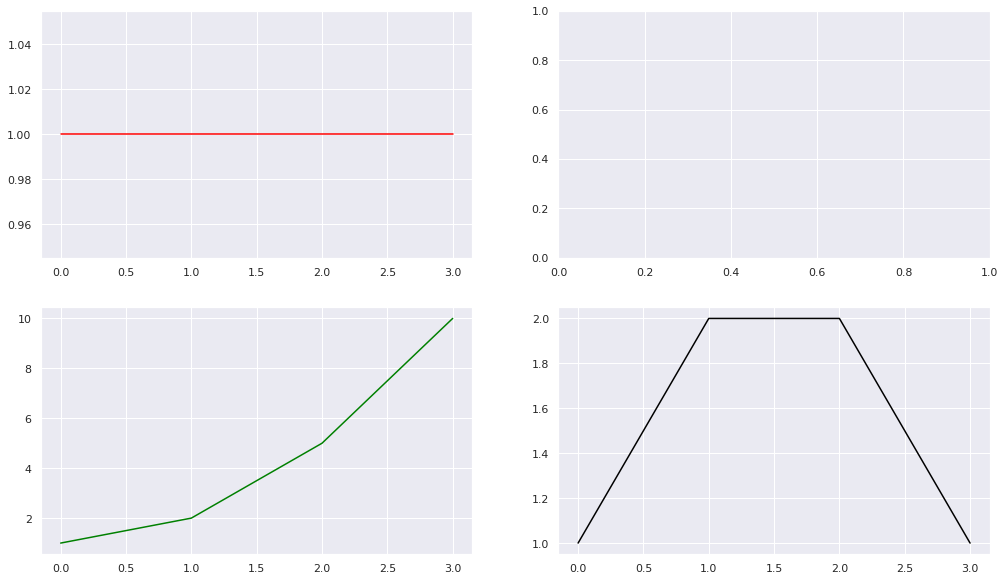

In [37]:
#код ревьюера


# Задаем subplots:
fig, ax = plt.subplots(nrows=2, ncols=2)
# fig - это "холст", ax графики на нем. Холст один, графиков может быть много. 

# Как мы размещаем графики и сколько определяем так:
# (nrows=2, ncols=2) - то есть у нас 4 графика, 2 на 2, а если (nrows=4, ncols=5) то у нас 20 графиков 4 строки на 5 столбцов
# ax[0, 0] - это график который находится в ячейке  1 (по строке) и 1 (по столбцу), ax[1, 0] - график в ячейке 2, 1 итд
# Рисуем:
# тут рисуем линию везде равную 1, рисуем красным в верхней левой части холста
ax[0, 0].plot([1,1,1,1,], 'red');
# тут линию растущую, зеленым
ax[1, 0].plot([1,2,5,10], 'green');

ax = ax.flatten()
# .flatten() -вытягивает в один ряд теперь  ax[0, 0] это ax[0], а ax[1, 1] это ax[3]. Так удобней 


ax[3].plot([1,2,2,1], 'black');


# Вообще то все о subplots! )))


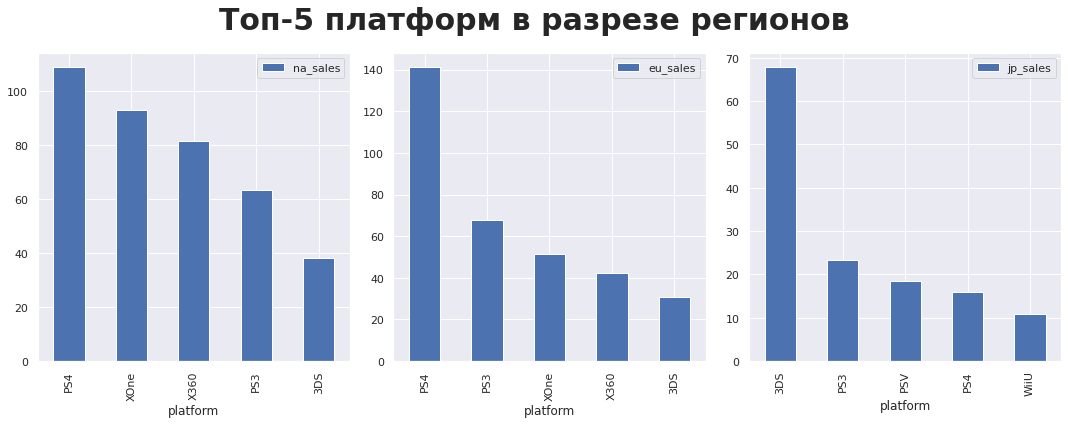

In [38]:


# Создаю свой датасет
data_my = pd.read_csv('/datasets/games.csv')
data_my.columns = map(str.lower, data_my.columns)
data_my = data_my.dropna(subset = ['year_of_release', 'name', 'genre'])
data_my['rating'] = data_my['rating'].fillna('unknown')
data_my['total_sales'] = data_my[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data_my = data_my[data_my['year_of_release'] > 2012]



# А теперь мы можем в каждую ячейку поместить свой график либо вручную либо в цикле. Лучше конечно в цикле:

# Задаем subplots: 1 строка 3 столбца
fig, ax = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Топ-5 платформ в разрезе регионов', fontsize = 30, fontweight='bold')


for i, region in enumerate(['na_sales','eu_sales','jp_sales']):
#     ax = ax[i] так помещают каждый график в отдельную ячейку
    (data_my.pivot_table(index='platform', 
                                   values=region, 
                                   aggfunc='sum').nlargest(5, region)).plot(kind = 'bar', ax = ax[i])
# Чтобы всё корректно поместилось
    plt.tight_layout()
    
    
    
#  Можно строить техничней и интереснее, но мне кажется так понятней 
